# Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("/home/anukoolpurohit/Documents/Workspace/Nueromatch/NMA-DL/HandwritingBCI")

# Imports

In [3]:
from handwritingBCI import Path
from handwritingBCI.data.utils import get_dataset
import numpy as np

In [4]:
## Setting seed
SEED = 42
np.random.seed(SEED)

In [5]:
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Get data

In [6]:
PATH = Path("/home/anukoolpurohit/Documents/AnukoolPurohit/Datasets/HandwritingBCI/handwriting-bci/handwritingBCIData")

In [7]:
data, labels = get_dataset(PATH)

In [8]:
print(data.shape, len(labels))

(3627, 201, 192) 3627


# Visualize

In [9]:
def plot_electrode_data(data, label, index = None, title_size = 50,
                        figsize=(15, 15), deproc_label=None):
    if index is not None:
        data = data[index]
        label = label[index]
    if deproc_label:
        label = deproc_label(label)
    plt.figure(figsize=figsize)
    plt.imshow(data.T)
    plt.title(f"character: {label}",size=title_size)
    plt.xlabel("Time steps", size= title_size)
    plt.ylabel("Electrodes", size=title_size)
    plt.show()

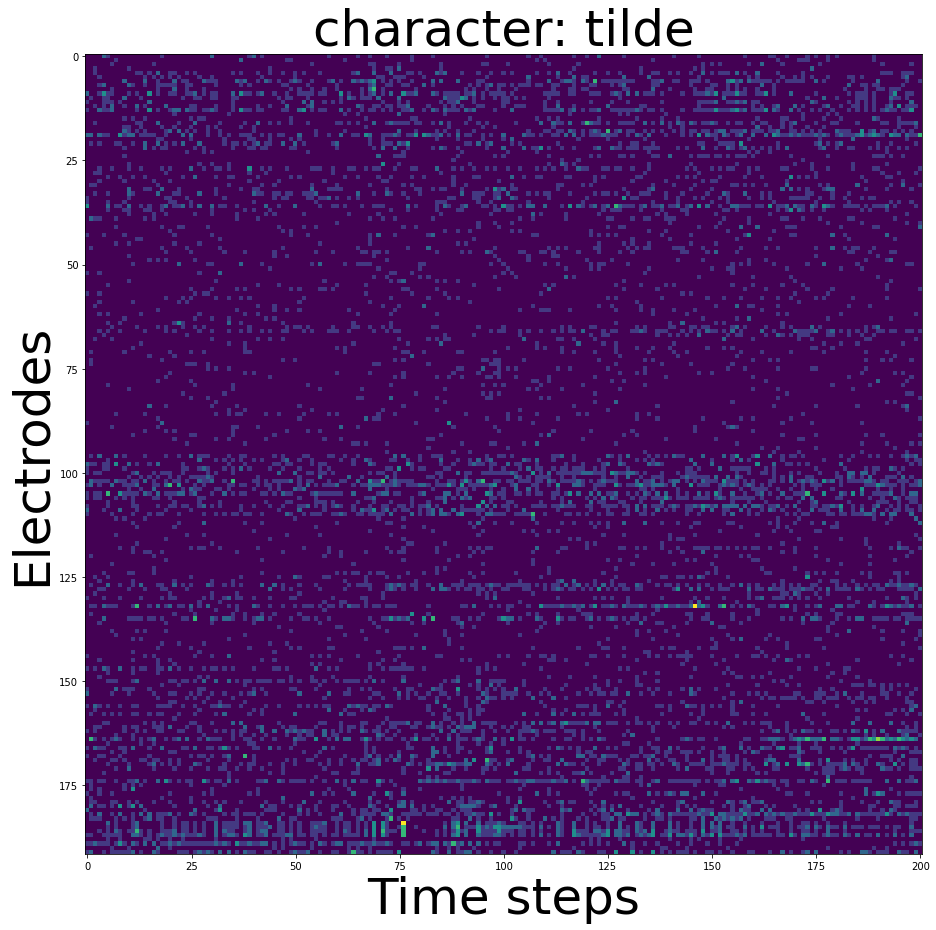

In [10]:
plot_electrode_data(data, labels,  0)

# Dataset and Dataloader

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
from handwritingBCI.data.utils import get_train_test_lengths
from handwritingBCI.data import NeuroDataset
from handwritingBCI.data.preprocessing import LabelEncoder

In [12]:
transform = torch.tensor
target_transform = LabelEncoder(labels)

In [13]:
neuro_dataset = NeuroDataset(data, labels, transform=transform, target_transform=target_transform)

In [14]:
train_test_lengths = get_train_test_lengths(len(neuro_dataset))

In [15]:
train_neuro_ds, test_nuero_ds = torch.utils.data.random_split(neuro_dataset, 
                                                              train_test_lengths,
                                                              generator=torch.Generator().manual_seed(SEED))

In [16]:
bs = 64
shuffle = True

In [17]:
neuro_train_dl = DataLoader(train_neuro_ds, batch_size=bs, shuffle=shuffle)

In [18]:
data, label = next(iter(neuro_train_dl))

tensor(26)


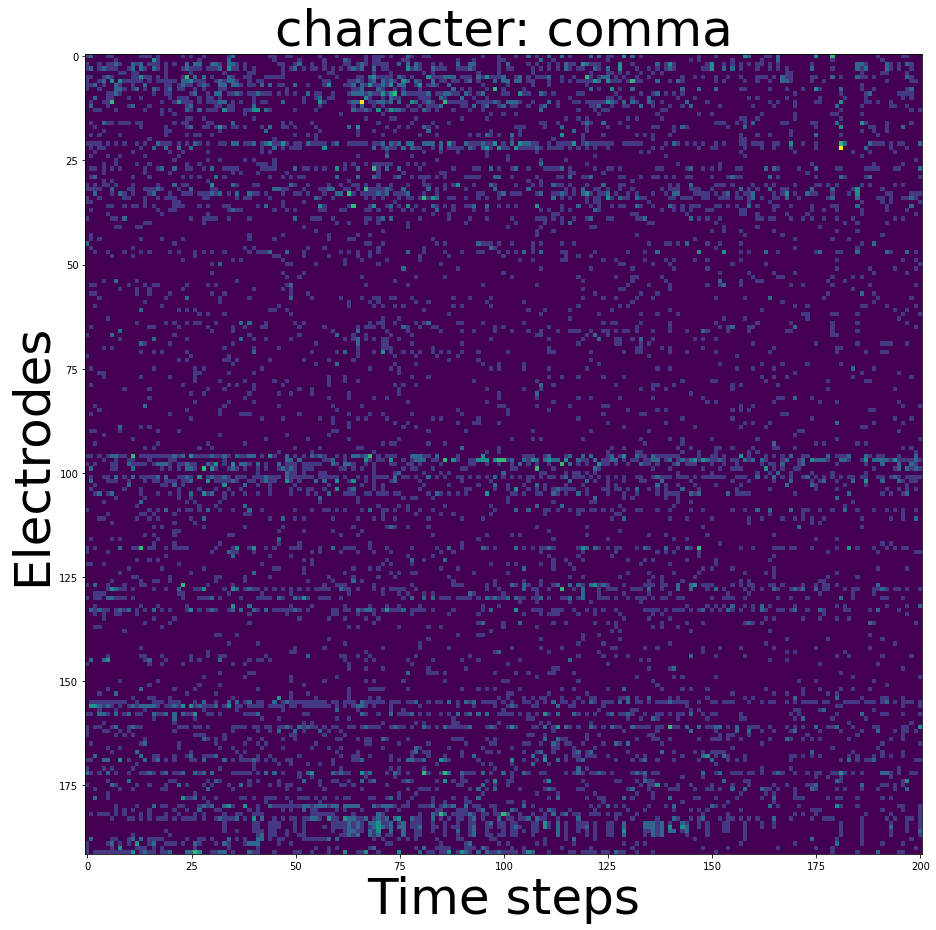

In [19]:
plot_electrode_data(data, label, index = 0, deproc_label=target_transform.deprocess)